In [93]:
import numpy as np
from scipy.linalg import eigh
from functools import reduce
import matplotlib.pyplot as plt

In [94]:
# 系统参数
N = 4  # qubit数
J = 1.0  # 自旋耦合强度
h = 1.0  # 横场强度


In [95]:
# 定义泡利矩阵
I = np.eye(2)
X = np.array([[0, 1], [1, 0]])
Z = np.array([[1, 0], [0, -1]])

In [96]:
# 构造N体泡利矩阵的张量积
def kron_N(pauli_list):
    return reduce(np.kron, pauli_list)

In [97]:
# 构造Hamiltonian矩阵
def build_hamiltonian(N, J, h):
    H = np.zeros((2**N, 2**N))
    # 最近邻Z_i Z_{i+1}项
    for i in range(N - 1):
        ops = [I] * N
        ops[i] = Z
        ops[i + 1] = Z
        H -= J * kron_N(ops)
    # 横场X_i项
    for i in range(N):
        ops = [I] * N
        ops[i] = X
        H -= h * kron_N(ops)
    return H

In [98]:
# 构造总磁化算符
def build_total_op(N, op):
    total = np.zeros((2**N, 2**N))
    for i in range(N):
        ops = [I] * N
        ops[i] = op
        total += kron_N(ops)
    return total

In [99]:
# 构建Hamiltonian
H = build_hamiltonian(N, J, h)

In [100]:
# 对角化
eigvals, eigvecs = eigh(H)
E0 = eigvals[0]
ground_state = eigvecs[:, 0]

In [101]:
# 构建总磁化算符
Z_total = build_total_op(N, Z)
X_total = build_total_op(N, X)

In [102]:
# 计算期望值
mz = np.vdot(ground_state, Z_total @ ground_state).real / N
mx = np.vdot(ground_state, X_total @ ground_state).real / N

# 输出结果
print(f"Exact Diagonalization Results for N={N}")
print(f"Ground state energy E0: {E0:.6f}")
print(f"<Z> per site: {mz:.6f}")
print(f"<X> per site: {mx:.6f}")

Exact Diagonalization Results for N=4
Ground state energy E0: -4.758770
<Z> per site: -0.000000
<X> per site: 0.810095


N=2, M=[0.01999600119960015, 0.055565210313381935, 0.15302883817974858, 0.39571507378218884, 0.7679504383806275, 0.9578942446942573, 0.9942480251463015, 0.9992514859365862, 0.9999032310878109, 0.99998750023437]
N=3, M=[0.008433462236390918, 0.023964357544603843, 0.07051738661710476, 0.2227622867777405, 0.6416408807677456, 0.9406342574838117, 0.9922652996230829, 0.9990008623821723, 0.9998709560589288, 0.9999833333333467]
N=4, M=[0.0075011248558288605, 0.020893408822668724, 0.058587893001600506, 0.17210356137585817, 0.5593126186888786, 0.93143976939012, 0.9912722982876616, 0.9988755469428998, 0.9998548185365606, 0.9999812498828176]
N=5, M=[0.0070001225037580935, 0.019480939249393935, 0.05428645583695333, 0.1539712992952127, 0.5023858597225621, 0.9257984933541163, 0.9906764476404655, 0.99880035766486, 0.9998451360231352, 0.9999799998125003]
N=6, M=[0.006666770938006008, 0.01855265766359109, 0.05166881995446171, 0.14512830673777619, 0.46226839293230343, 0.9220066700348952, 0.99027921220447

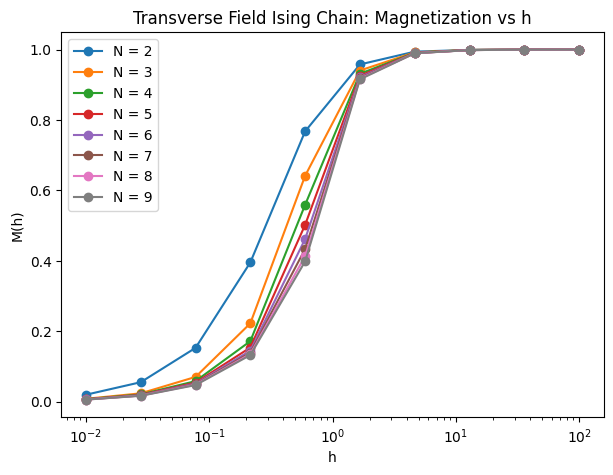

In [ ]:
def magnetization_x(ground_state, N, X, kron_N, I):
    """计算基态在x方向的平均磁化强度"""
    M = 0.0
    for i in range(N):
        ops = [I] * N
        ops[i] = X
        op = kron_N(ops)
        M += np.vdot(ground_state, op @ ground_state).real
    return M / N

hs = np.logspace(-2, 2, 10)
Ns = range(2, 10, 1)
plt.figure(figsize=(7,5))
M_h1 = []
for N in Ns:
    M = []
    for h in hs:
        H = build_hamiltonian(N, J=1.0, h=h)
        eigvals, eigvecs = eigh(H)
        ground_state = eigvecs[:, 0]
        M.append(magnetization_x(ground_state, N, X, kron_N, I))
    plt.plot(hs, M, marker='o', label=f"N = {N}")
    # 记录h=1时的M
    idx_h1 = np.argmin(np.abs(hs - 1.0))
    M_h1.append(M[idx_h1])
    print(f"N={N}, M={M}")
plt.xscale('log')
plt.xlabel("h")
plt.ylabel("M(h)")
plt.legend()
plt.title("Transverse Field Ising Chain: Magnetization vs h")
plt.show()

# 单独展示 h=1 时不同 N 下的 M
print("h=1 时，不同 N 下的 M 值：")
for n, m in zip(Ns, M_h1):
    print(f"N={n}, M(h=1)={m}")